<a href="https://colab.research.google.com/github/Mellow-py/My-ML-practical-codes/blob/master/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/content/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


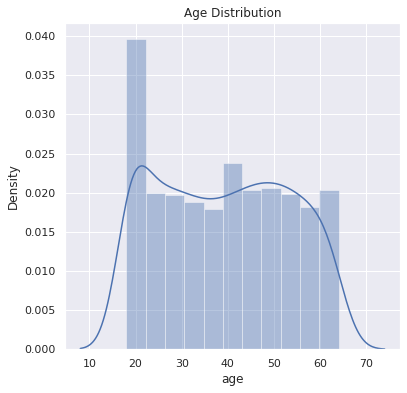

In [7]:
#Distribution of age value

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

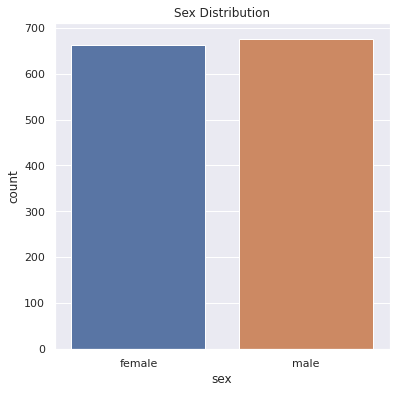

In [8]:
#Gender distribution

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

In [9]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


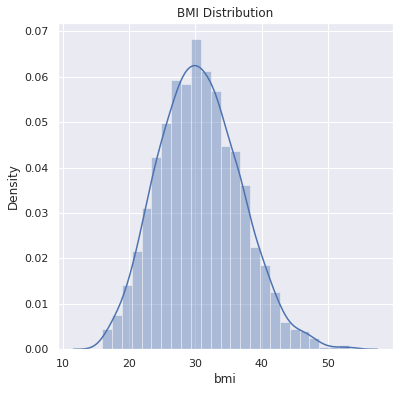

In [10]:
#BMI distribution

plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

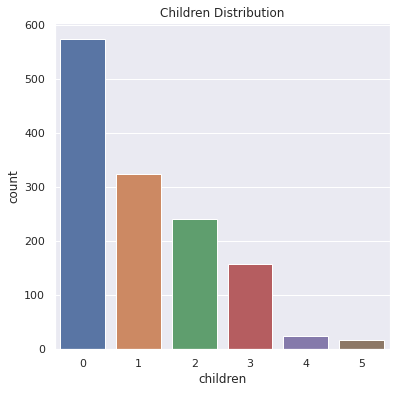

In [11]:
#Children distribution

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children Distribution')
plt.show()

In [12]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

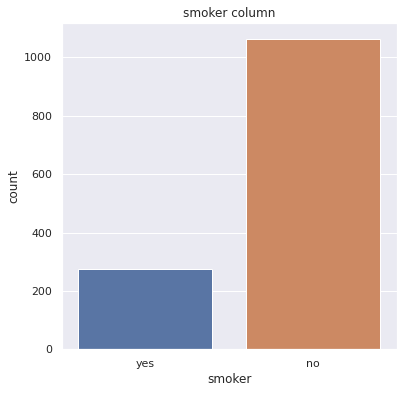

In [13]:
#Sneaker

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('smoker column')
plt.show()

In [14]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

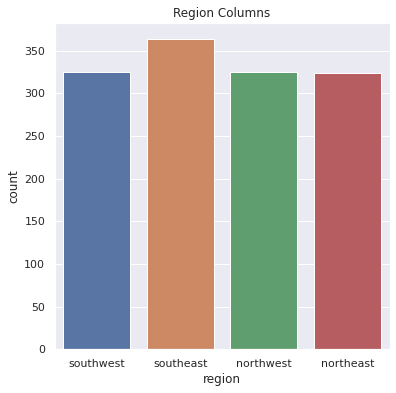

In [15]:
#Region Column 

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('Region Columns')
plt.show()

In [16]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


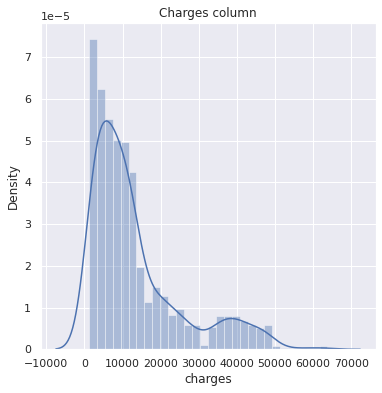

In [17]:
#Charges value

plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges column')
plt.show()

Pre processing

In [18]:
#encoding the sex column 'yes/no'
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding the smoker column
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding the region column
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast': 2, 'northwest':3}}, inplace=True)

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [21]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [23]:
#Split the dataset

X = data.drop(columns='charges', axis=1)
y = data['charges']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Model Training

In [25]:
model = LinearRegression()


In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
train_prediction = model.predict(X_train)
r2_train = metrics.r2_score(y_train, train_prediction)
print('R Squared value: ', r2_train)

R Squared value:  0.751505643411174


Prediction System

In [31]:
data_input = ( 31, 1, 25.74, 0, 1, 0)
data_to_numpy = np.asarray(data_input)
reshape_data = data_to_numpy.reshape(1, -1)
pred = model.predict(reshape_data)
print(pred)
print('The insurance cost in USD ', pred[0])

[3760.0805765]
The insurance cost in USD  3760.0805764960587


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
